In [105]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [158]:
taille=100
x = 1.57 * torch.ones(taille)
for i in range(taille):
    x[i]=x[i]+0.015*i
print(x)

tensor([1.5700, 1.5850, 1.6000, 1.6150, 1.6300, 1.6450, 1.6600, 1.6750, 1.6900,
        1.7050, 1.7200, 1.7350, 1.7500, 1.7650, 1.7800, 1.7950, 1.8100, 1.8250,
        1.8400, 1.8550, 1.8700, 1.8850, 1.9000, 1.9150, 1.9300, 1.9450, 1.9600,
        1.9750, 1.9900, 2.0050, 2.0200, 2.0350, 2.0500, 2.0650, 2.0800, 2.0950,
        2.1100, 2.1250, 2.1400, 2.1550, 2.1700, 2.1850, 2.2000, 2.2150, 2.2300,
        2.2450, 2.2600, 2.2750, 2.2900, 2.3050, 2.3200, 2.3350, 2.3500, 2.3650,
        2.3800, 2.3950, 2.4100, 2.4250, 2.4400, 2.4550, 2.4700, 2.4850, 2.5000,
        2.5150, 2.5300, 2.5450, 2.5600, 2.5750, 2.5900, 2.6050, 2.6200, 2.6350,
        2.6500, 2.6650, 2.6800, 2.6950, 2.7100, 2.7250, 2.7400, 2.7550, 2.7700,
        2.7850, 2.8000, 2.8150, 2.8300, 2.8450, 2.8600, 2.8750, 2.8900, 2.9050,
        2.9200, 2.9350, 2.9500, 2.9650, 2.9800, 2.9950, 3.0100, 3.0250, 3.0400,
        3.0550])


In [159]:
trainset = torch.utils.data.DataLoader(x, batch_size=8, shuffle=True)

In [160]:
print (x)
y=torch.sin(x)
print (y)

tensor([1.5700, 1.5850, 1.6000, 1.6150, 1.6300, 1.6450, 1.6600, 1.6750, 1.6900,
        1.7050, 1.7200, 1.7350, 1.7500, 1.7650, 1.7800, 1.7950, 1.8100, 1.8250,
        1.8400, 1.8550, 1.8700, 1.8850, 1.9000, 1.9150, 1.9300, 1.9450, 1.9600,
        1.9750, 1.9900, 2.0050, 2.0200, 2.0350, 2.0500, 2.0650, 2.0800, 2.0950,
        2.1100, 2.1250, 2.1400, 2.1550, 2.1700, 2.1850, 2.2000, 2.2150, 2.2300,
        2.2450, 2.2600, 2.2750, 2.2900, 2.3050, 2.3200, 2.3350, 2.3500, 2.3650,
        2.3800, 2.3950, 2.4100, 2.4250, 2.4400, 2.4550, 2.4700, 2.4850, 2.5000,
        2.5150, 2.5300, 2.5450, 2.5600, 2.5750, 2.5900, 2.6050, 2.6200, 2.6350,
        2.6500, 2.6650, 2.6800, 2.6950, 2.7100, 2.7250, 2.7400, 2.7550, 2.7700,
        2.7850, 2.8000, 2.8150, 2.8300, 2.8450, 2.8600, 2.8750, 2.8900, 2.9050,
        2.9200, 2.9350, 2.9500, 2.9650, 2.9800, 2.9950, 3.0100, 3.0250, 3.0400,
        3.0550])
tensor([1.0000, 0.9999, 0.9996, 0.9990, 0.9982, 0.9972, 0.9960, 0.9946, 0.9929,
        0.9910, 0.9889,

In [161]:
print (trainset)

In [162]:
import torch.nn as nn
import torch.nn.functional as F #the activation function 
import numpy as np

In [163]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8) #fc = fully connected layer , 28*28 number of input
        self.fc2 = nn.Linear(8, 8)    #in our case there are 28*28 images as inputs    #ze are going to use 64 neuron per layer network 
        self.fc3 = nn.Linear(8, 1)    #10 is the number of outputs we gonna classify as (in this case 10 : from 0 to 9)
    #where the flow of data is going through
    
    def forward(self, x):
        x = F.sigmoid(self.fc1(x)) #relu stands for rectified linear
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)#F.relu(self.fc3(x))
        
        return torch.sigmoid(x) #don't forget the activation function 
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)


In [164]:
X = torch.rand(1)
X = X.view(-1,1)
print (X)
output = net(X)
print(output)

tensor([[0.9017]])
tensor([[0.5200]], grad_fn=<SigmoidBackward>)


In [165]:
print(torch.sin(X))

tensor([[0.6203]])


In [166]:
import torch.optim as optim

loss_function = nn.MSELoss()#For these scalar classifications use crossEntropyLoss
optimizer = optim.Adam(net.parameters(), lr=0.015) #the lr : learning rate as the "size of steps"



In [179]:
for epoch in range(50): # 3 full passes over the data
    for data in trainset: 
        X = data  # X is the batch of features, y is the batch of targets.
        output = net(X.view(-1,1))
        target = torch.sin(X)
        target = target.view(-1,1).float()
        loss = F.mse_loss(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
print(loss) 

tensor(0.0002, grad_fn=<MseLossBackward>)


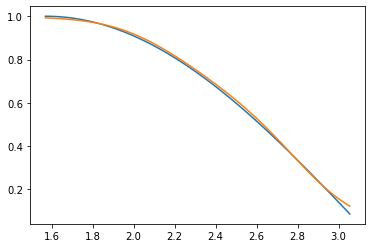

In [180]:
predictions = net(torch.Tensor(np.reshape(x, (-1,1))))
plt.plot(x, y , x ,predictions.detach().numpy())
plt.show()
